In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **CLIP-I, CLIP-T, DINO**

- **CLIP-I** - average pairwise cosine similarity between CLIP embeddings of generated and real images
- **CLIP-T** - average cosine similarity between prompt and CLIP embeddings of generated images
- **DINO** - average pairwise cosine similarity between the Vit-S/16 DINO embeddings of generated and real images

In [11]:
import os

os.chdir("/net/tscratch/people/plglukaszst/projects/ziplora-analysis/")

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torch.nn import functional as F
from transformers import AutoModel, AutoProcessor, AutoTokenizer
import argparse
import os

import torch
from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline
import itertools


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [14]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [15]:
def get_model_outs(pretrained_model_name_or_path: str, prompts:list, samples_per_prompt: int):
    model_path = pretrained_model_name_or_path
    diffusion_pipe = DiffusionPipeline.from_pretrained(
        model_path, torch_dtype=torch.float16
    )
    diffusion_pipe = diffusion_pipe.to("cuda")
    generator = torch.Generator("cuda")
    generator = generator.manual_seed(0)

    tasks_prompts = []
    tasks_samples = []
    for current_prompt in prompts:
        task_prompts = [current_prompt] * samples_per_prompt
        task_samples = diffusion_pipe(
            prompt=task_prompts, output_type="pil", generator=generator
        )
        task_prompts.append(task_prompts)
        tasks_samples.append(task_samples)

    return tasks_prompts, list(itertools.chain.from_iterable([out.images for out in tasks_samples]))

In [16]:
N_TASKS = 5
MODELS = ["wolf_plushie_sd1", "backpack_sd2", "dog6_sd3", "candle_sd4", "cat2_sd5"]
TOKENS = ["sks stuffed animal", "zwz backpack", "sbu dog", "uwu candle", "pdw cat"]
AFTER_TASK_MODEL = {
    k+1:v for k,v in zip(range(N_TASKS), MODELS)
}
TOKEN_TASK = {
    k+1: v for k,v in zip(range(N_TASKS), MODELS)
}

PROMPTS = ['a {} in a purple wizard outfit', 'a {} in a police outfit', 'a {} wearing a santa hat', 'a {} in a jail', 'a {} looking into a mirror']


In [62]:
def run_model(task_number):
    if task_number >= 1:
        per_task_outs = {}
        for curr_task_number in range(task_number):
            task_outs = {}
            model_path = f"./models/{AFTER_TASK_MODEL[task_number]}"
            prompts = [
                prompt.format(TOKEN_TASK[curr_task_number+1]) for prompt in PROMPTS
            ]
            out_prompts, out_samples = get_model_outs(pretrained_model_name_or_path=model_path, prompts=prompts, samples_per_prompt=8)
            task_outs["prompts"] = out_prompts
            task_outs["samples"] = out_samples
            per_task_outs[curr_task_number+1] = task_outs
        return per_task_outs
    else:
        per_task_outs = {}
        for curr_task_number in range(5):
            task_outs = {}
            model_path = f"stabilityai/stable-diffusion-xl-base-1.0"
            prompts = [
                prompt.format(TOKEN_TASK[curr_task_number+1]) for prompt in PROMPTS
            ]
            out_prompts, out_samples = get_model_outs(pretrained_model_name_or_path=model_path, prompts=prompts, samples_per_prompt=8)
            task_outs["prompts"] = out_prompts
            task_outs["samples"] = out_samples
            per_task_outs[curr_task_number+1] = task_outs
        return per_task_outs

In [63]:
task_outs_0 = run_model(0)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/net/tscratch/people/plglukaszst/envs/lora/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 8.00 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
/net/tscratch/people/plglukaszst/envs/lora/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
/net/tscratch/people/plglukaszst/envs/lora/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 24.01 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
/net/

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [18]:
task_outs_1 = run_model(1)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/net/tscratch/people/plglukaszst/envs/lora/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [19]:
task_outs_2 = run_model(2)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [20]:
task_outs_3 = run_model(3)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [21]:
task_outs_4 = run_model(4)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [28]:
task_outs_5 = run_model(5)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
grid = image_grid(imgs, rows=8, cols=5)


# Metrics

In [36]:
DATASETS = ["wolf_plushie", "backpack", "dog6", "candle", "cat2"]

In [37]:
from lora.metrics import clip_image_metric, dino_metric

In [65]:
for task in range(5):
    model_samples = task_outs_0[task+1]['samples']
    gt_path = os.path.join("data/dreambooth/dataset/", DATASETS[task])
    print(f"Task number: {task}, CLIP: {clip_image_metric(model_samples, gt_path)}, DINO: {dino_metric(model_samples, gt_path)}")

Task number: 0, CLIP: 0.5920740962028503, DINO: 0.24348683655261993
Task number: 1, CLIP: 0.5914605259895325, DINO: 0.28477293252944946
Task number: 2, CLIP: 0.708609402179718, DINO: 0.36222001910209656
Task number: 3, CLIP: 0.5059909224510193, DINO: 0.12177591770887375
Task number: 4, CLIP: 0.7101449370384216, DINO: 0.5030713677406311


In [64]:
for task in range(1):
    model_samples = task_outs_1[task+1]['samples']
    gt_path = os.path.join("data/dreambooth/dataset/", DATASETS[task])
    print(f"Task number: {task}, CLIP: {clip_image_metric(model_samples, gt_path)}, DINO: {dino_metric(model_samples, gt_path)}")

/net/tscratch/people/plglukaszst/envs/lora/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Task number: 0, CLIP: 0.7672311663627625, DINO: 0.6100791692733765


In [43]:
for task in range(2):
    model_samples = task_outs_2[task+1]['samples']
    gt_path = os.path.join("data/dreambooth/dataset/", DATASETS[task])
    print(f"Task number: {task}, CLIP: {clip_image_metric(model_samples, gt_path)}, DINO: {dino_metric(model_samples, gt_path)}")

Task number: 0, CLIP: 0.7478558421134949, DINO: 0.560372531414032
Task number: 1, CLIP: 0.8447762727737427, DINO: 0.5591630339622498


In [44]:
for task in range(3):
    model_samples = task_outs_3[task+1]['samples']
    gt_path = os.path.join("data/dreambooth/dataset/", DATASETS[task])
    print(f"Task number: {task}, CLIP: {clip_image_metric(model_samples, gt_path)}, DINO: {dino_metric(model_samples, gt_path)}")

Task number: 0, CLIP: 0.6973913311958313, DINO: 0.454707533121109
Task number: 1, CLIP: 0.7606914639472961, DINO: 0.46327629685401917
Task number: 2, CLIP: 0.8467984199523926, DINO: 0.8003391623497009


In [45]:
for task in range(4):
    model_samples = task_outs_4[task+1]['samples']
    gt_path = os.path.join("data/dreambooth/dataset/", DATASETS[task])
    print(f"Task number: {task}, CLIP: {clip_image_metric(model_samples, gt_path)}, DINO: {dino_metric(model_samples, gt_path)}")

Task number: 0, CLIP: 0.7672674059867859, DINO: 0.5761002898216248
Task number: 1, CLIP: 0.7815966010093689, DINO: 0.47583648562431335
Task number: 2, CLIP: 0.7972794771194458, DINO: 0.6626940965652466
Task number: 3, CLIP: 0.6590635180473328, DINO: 0.37658119201660156


In [46]:
for task in range(5):
    model_samples = task_outs_5[task+1]['samples']
    gt_path = os.path.join("data/dreambooth/dataset/", DATASETS[task])
    print(f"Task number: {task}, CLIP: {clip_image_metric(model_samples, gt_path)}, DINO: {dino_metric(model_samples, gt_path)}")

Task number: 0, CLIP: 0.699261486530304, DINO: 0.46788525581359863
Task number: 1, CLIP: 0.7893842458724976, DINO: 0.4650656282901764
Task number: 2, CLIP: 0.7865535616874695, DINO: 0.6821586489677429
Task number: 3, CLIP: 0.6152812242507935, DINO: 0.23177675902843475
Task number: 4, CLIP: 0.8123960494995117, DINO: 0.7166255712509155


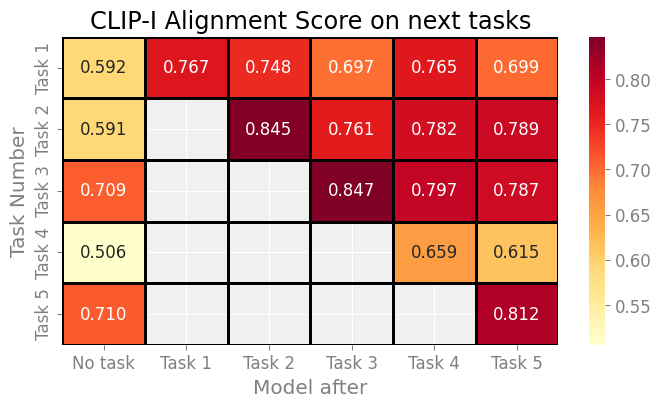

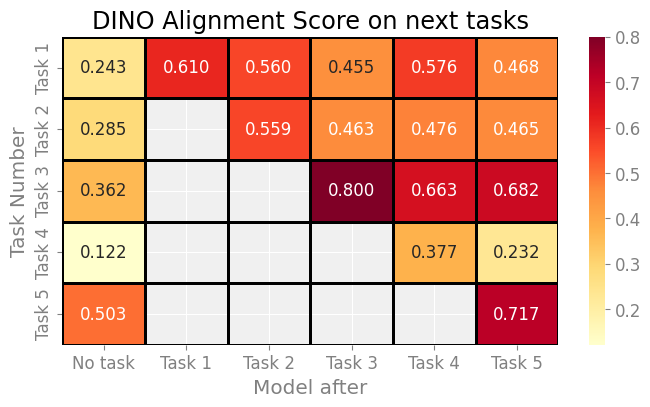

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Creating a matrix for the incremental model performance for heatmap
clip_matrix_updated = np.array([
    [0.5920740962028503, 0.5914605259895325, 0.708609402179718, 0.5059909224510193, 0.7101449370384216],
    [0.7672311663627625, np.nan, np.nan, np.nan, np.nan],
    [0.7478558421134949, 0.8447762727737427, np.nan, np.nan, np.nan],
    [0.6973913311958313, 0.7606914639472961, 0.8467984199523926, np.nan, np.nan],
    [0.7652674059867859, 0.7815966010093689, 0.7972794771194458, 0.6590635180473328, np.nan],
    [0.699261486530304, 0.7893842458724976, 0.7865535616874695, 0.6152812242507935, 0.8123960494995117]
]).T

dino_matrix_updated = np.array([
    [0.24348683655261993, 0.28477293252944946, 0.36222001910209656, 0.12177591770887375, 0.5030713677406311],
    [0.6100791692733765, np.nan, np.nan, np.nan, np.nan],
    [0.560372531414032, 0.5591630339622498, np.nan, np.nan, np.nan],
    [0.454707533121109, 0.46327629685401917, 0.8003391623497009, np.nan, np.nan],
    [0.5761002898216248, 0.47583648562431335, 0.6626940965652466, 0.37658119201660156, np.nan],
    [0.46788525581359863, 0.4650656282901764, 0.6821586489677429, 0.23177675902843475, 0.7166255712509155]
]).T

tasks = ['No task','Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5']
colormap = 'YlOrRd'

# Plotting the heatmap for CLIP metric
plt.figure(figsize=(8, 4))
sns.heatmap(clip_matrix_updated, annot=True, fmt=".3f", cmap=colormap, xticklabels=tasks, yticklabels=tasks[1:], linewidths=.9, linecolor='black')
plt.title('CLIP-I Alignment Score on next tasks')
plt.xlabel('Model after')
plt.ylabel('Task Number')
plt.savefig("fig1.png")
plt.show()

# Plotting the heatmap for DINO metric
plt.figure(figsize=(8, 4))
sns.heatmap(dino_matrix_updated, annot=True, fmt=".3f", cmap=colormap, xticklabels=tasks, yticklabels=tasks[1:], linewidths=.9, linecolor='black')
plt.title('DINO Alignment Score on next tasks')
plt.xlabel('Model after')
plt.ylabel('Task Number')
plt.savefig("fig2.png")
plt.show()

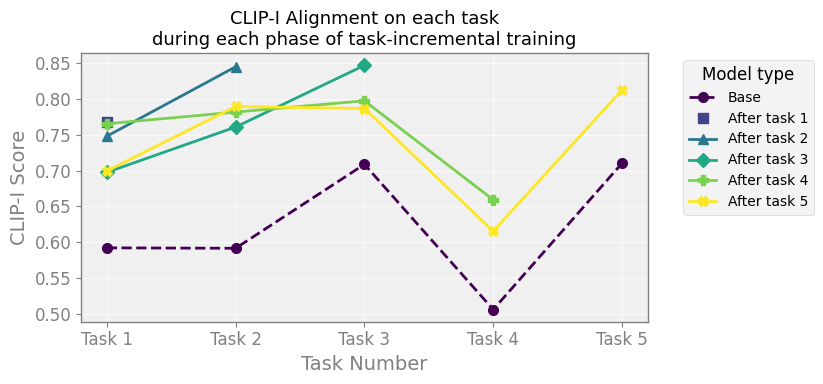

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot style and colors
plt.style.use('ggplot')
plt.rcParams.update({
    'axes.facecolor': '#f0f0f0',  # Light gray background for the plot area
    'figure.facecolor': '#ffffff',  # Light gray background for the figure
    'grid.color': 'white',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.0,
    'axes.labelcolor': 'gray',
    'xtick.color': 'gray',
    'ytick.color': 'gray',
    'font.size': 12,
    'legend.fontsize': 10,
    'legend.title_fontsize': 10,
    'figure.figsize': (14, 7)
})

plt.figure(figsize=(10, 4))

# Transpose the matrix for easier plotting
clip_matrix_updated_transposed = clip_matrix_updated.T

# Define a list of colors for each task finished
colors = plt.cm.viridis(np.linspace(0, 1, clip_matrix_updated_transposed.shape[1] + 1))
markers = ['o', 's', '^', 'D', 'P', 'X', 'H']

for task_finished in range(clip_matrix_updated_transposed.shape[1] + 1):
    if task_finished == 0:
        y = clip_matrix_updated_transposed[0, :]
        x = np.arange(y.shape[0]) + 1
        plt.plot(x, y, marker=markers[task_finished], color=colors[task_finished], 
                 linestyle='--', linewidth=2, markersize=7, label='Base')
    elif task_finished == 1:
        y = clip_matrix_updated_transposed[task_finished, 0]
        x = [1]
        plt.plot(x, y, marker=markers[task_finished], color=colors[task_finished], 
                 linestyle='', markersize=7, label=f'After task {task_finished}')
    else:
        y = clip_matrix_updated_transposed[task_finished, :]
        x = np.arange(y.shape[0]) + 1
        plt.plot(x, y, marker=markers[task_finished], color=colors[task_finished], 
                 linestyle='-', linewidth=2, markersize=7, label=f'After task {task_finished}')

# Add title and labels
plt.title('CLIP-I Alignment on each task\nduring each phase of task-incremental training', fontsize=13)
plt.xlabel('Task Number', fontsize=14, color='gray')
plt.ylabel('CLIP-I Score', fontsize=14, color='gray')
plt.xticks(ticks=np.arange(1, len(tasks)), labels=tasks[1:], fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')

# Add legend and grid
plt.legend(title='Model type', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='-', linewidth=0.7, color='white', alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("fig3.png")

plt.show()


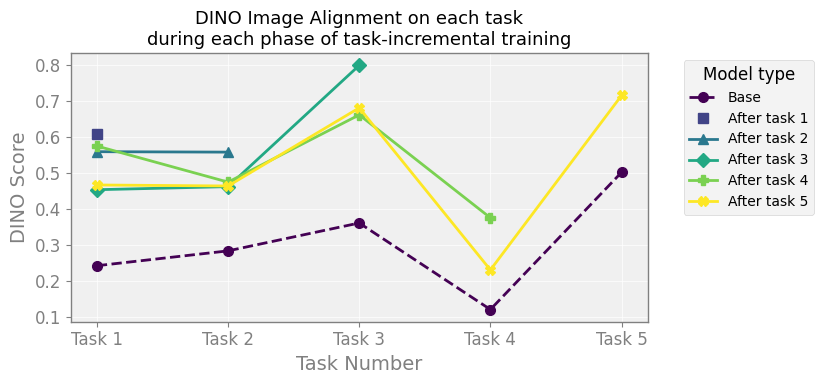

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot style and colors
plt.style.use('ggplot')
plt.rcParams.update({
    'axes.facecolor': '#f0f0f0',  # Light gray background for the plot area
    'figure.facecolor': '#ffffff',  # Light gray background for the figure
    'grid.color': 'white',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.0,
    'axes.labelcolor': 'gray',
    'xtick.color': 'gray',
    'ytick.color': 'gray',
    'font.size': 12,
    'legend.fontsize': 10,
    'legend.title_fontsize': 10,
    'figure.figsize': (14, 7)
})

plt.figure(figsize=(10, 4))

# Transpose the matrix for easier plotting
dino_matrix_updated_transposed = dino_matrix_updated.T

# Define a list of colors for each task finished
colors = plt.cm.viridis(np.linspace(0, 1, dino_matrix_updated_transposed.shape[1] + 1))
markers = ['o', 's', '^', 'D', 'P', 'X', 'H']

for task_finished in range(dino_matrix_updated_transposed.shape[1] + 1):
    if task_finished == 0:
        y = dino_matrix_updated_transposed[0, :]
        x = np.arange(y.shape[0]) + 1
        plt.plot(x, y, marker=markers[task_finished], color=colors[task_finished], 
                 linestyle='--', linewidth=2, markersize=7, label='Base')
    elif task_finished == 1:
        y = dino_matrix_updated_transposed[task_finished, 0]
        x = [1]
        plt.plot(x, y, marker=markers[task_finished], color=colors[task_finished], 
                 linestyle='', markersize=7, label=f'After task {task_finished}')
    else:
        y = dino_matrix_updated_transposed[task_finished, :]
        x = np.arange(y.shape[0]) + 1
        plt.plot(x, y, marker=markers[task_finished], color=colors[task_finished], 
                 linestyle='-', linewidth=2, markersize=7, label=f'After task {task_finished}')

# Add title and labels
plt.title('DINO Image Alignment on each task\nduring each phase of task-incremental training', fontsize=13)
plt.xlabel('Task Number', fontsize=14, color='gray')
plt.ylabel('DINO Score', fontsize=14, color='gray')
plt.xticks(ticks=np.arange(1, len(tasks)), labels=tasks[1:], fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')

# Add legend and grid
plt.legend(title='Model type', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='-', linewidth=0.7, color='white', alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("fig4.png")

plt.show()
